In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


In [8]:
#read data set
data = pd.read_csv("StudentsPerformance.csv")
print(data.shape)
data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
#statistical insights
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
percentage_of_missing_data

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [10]:
data.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


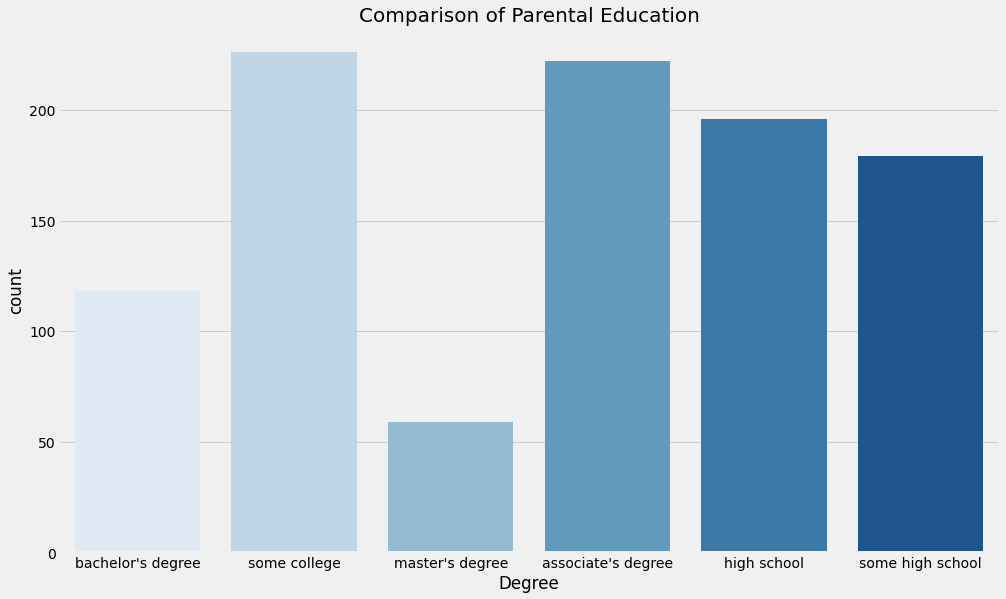

In [12]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [13]:
data.columns = [col.title().replace(' ','_') for col in data.columns]
# new cols names
for col in data.columns:
  print(col)

Gender
Race/Ethnicity
Parental_Level_Of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score


In [14]:
categorical_features = ['Gender', 'Race/Ethnicity', 'Parental_Level_Of_Education','Lunch', 'Test_Preparation_Course']
for col in categorical_features:
  print ('-'*50)
  print (f'The column name is: {col}')
  print (data [col]. value_counts ())

--------------------------------------------------
The column name is: Gender
female    518
male      482
Name: Gender, dtype: int64
--------------------------------------------------
The column name is: Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64
--------------------------------------------------
The column name is: Parental_Level_Of_Education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64
--------------------------------------------------
The column name is: Lunch
standard        645
free/reduced    355
Name: Lunch, dtype: int64
--------------------------------------------------
The column name is: Test_Preparation_Course
none         642
completed    358
Name: Test_Preparation_Course, dtype: int64


In [15]:
Math_filtered = data. query ('Math_Score > 80')
Reading_filtered =data.query('Reading_Score > 80')
Writing_filtered =data.query('Writing_Score > 80')
Math_stat = Math_filtered. groupby('Gender')['Math_Score'].count()
Reading_stat = Reading_filtered. groupby ('Gender') ['Reading_Score'].count ()
Writing_stat = Writing_filtered.groupby ('Gender')['Writing_Score'].count ()

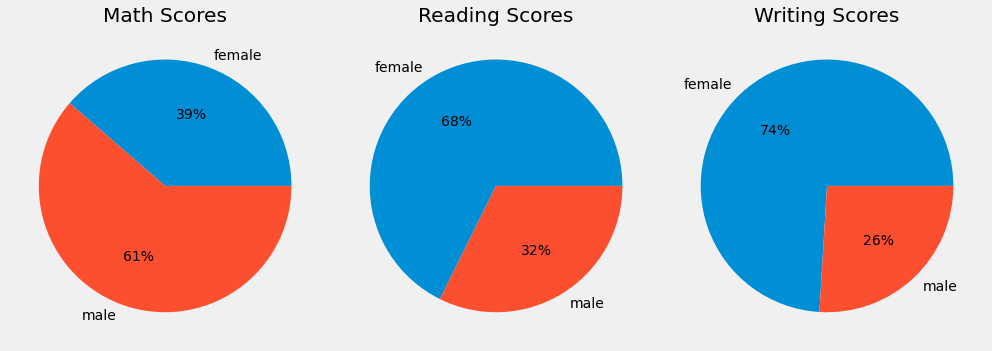

In [16]:
plt.figure(figsize= (14,6))
plt.subplot (1, 3, 1) #the figure has 1 row, 2 columns, and this plot is the first plot.
Math_stat.plot(kind = 'pie', autopct = "%.0f%%")
plt. title ('Math Scores')
plt.ylabel('')
plt.tight_layout ()
plt. subplot (1, 3, 2)
Reading_stat.plot(kind = 'pie', autopct = "%.0f%%")
plt.title('Reading Scores')
plt.ylabel('')
plt.tight_layout ()
plt.subplot (1, 3, 3)
Writing_stat.plot(kind = 'pie', autopct = "%.0f%%")
plt.title('Writing Scores')
plt.ylabel ('')
plt.tight_layout ()

## Analysis: a larger number of males scored more than 80% in mathematics compared to the females while a larger number of females scored more than 80% in Reading and Writing.


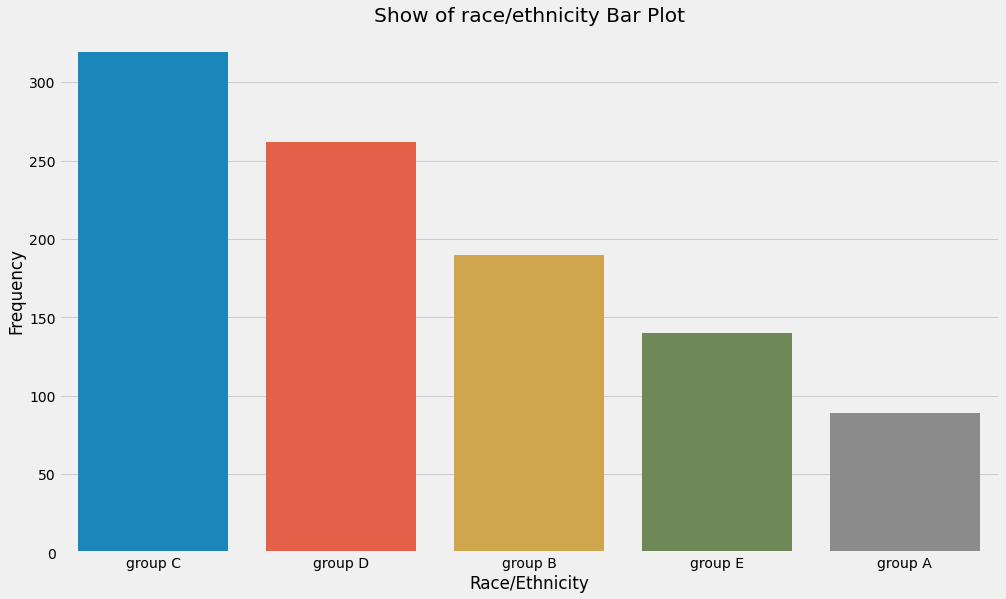

In [17]:
sns.barplot (x= data['Race/Ethnicity'].value_counts().index,y= data['Race/Ethnicity'].value_counts().values) 

plt.xlabel ('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Show of race/ethnicity Bar Plot')
plt.show();

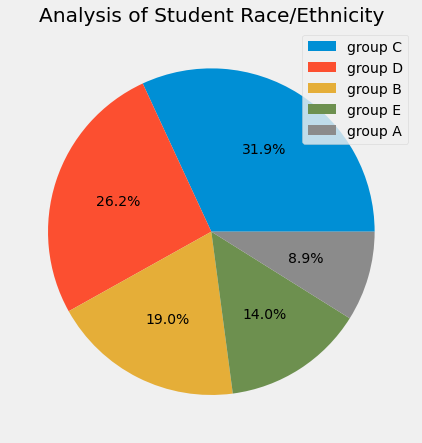

In [18]:
labels=data['Race/Ethnicity'].value_counts ().index
values=data['Race/Ethnicity'].value_counts().values
plt.figure(figsize= (7,7))
plt.pie(values, autopct='%1.1f%%')
plt.title('Analysis of Student Race/Ethnicity') 
plt. legend (labels, loc='best')
plt.show()

## from above analysis we can say that larger number of students belong to group C i.e 31.9%

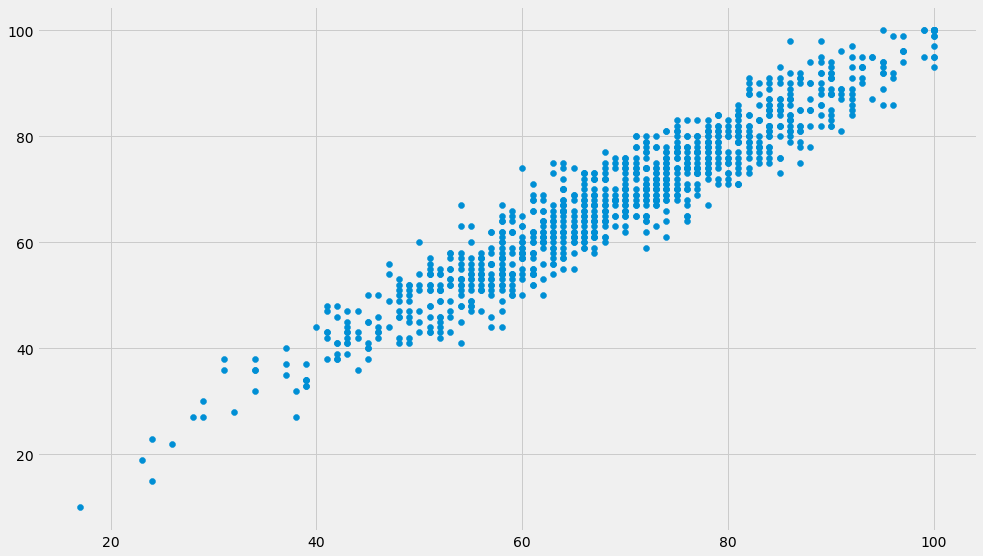

In [19]:
plt.scatter (data['Reading_Score'], data['Writing_Score']);

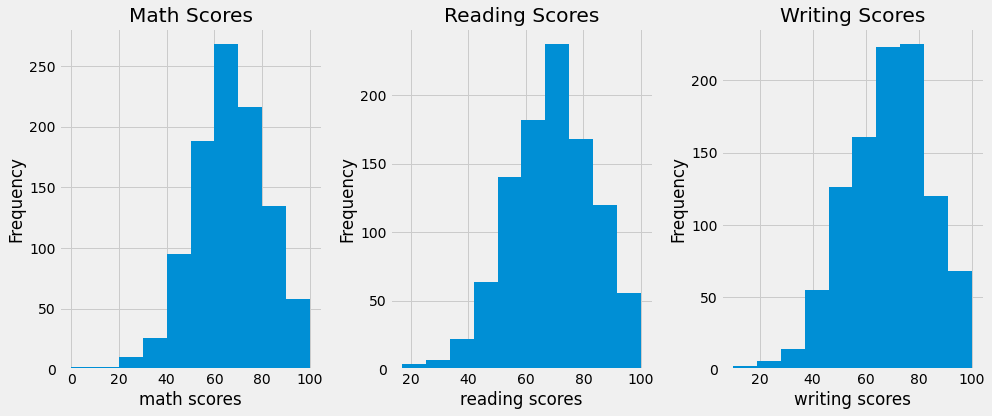

In [22]:
plt.figure(figsize= (14,6))
plt.subplot (1, 3, 1) #the figure has 1 row, 2 columns, and this plot is the first plot.
data[ 'Math_Score'].plot(kind='hist')
plt.title('Math Scores')
plt.xlabel('math scores')
plt.tight_layout ()
plt. subplot (1, 3, 2)
data[ 'Reading_Score' ].plot (kind='hist')
plt.title('Reading Scores')
plt.xlabel('reading scores')
plt.tight_layout ()
plt.subplot (1, 3, 3)
data['Writing_Score'].plot(kind='hist')
plt.title('Writing Scores')
plt.xlabel('writing scores')
plt.tight_layout()

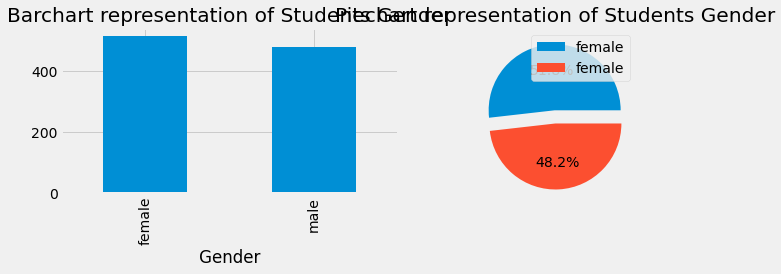

In [29]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize= (10, 4))
gender = data ['Gender'].value_counts() 
gender.plot (kind='bar', ax=ax1, x='Gender', title= 'Barchart representation of Students Gender')
ax1. set_xlabel('Gender')
explode = [0, 0.2] 
ax2.pie(gender, autopct='%1.1f%%', explode=explode) 
ax2.set_title('Piechart representation of Students Gender')
ax2. legend(data['Gender'],loc="upper right")
plt.tight_layout(pad=1.0)

## from above analysis we can say that majority of students population is female.